# CIFAR 10 - Categorical Classification

# Import Tensorflow & Keras

- GPU 키기

- import Keras

In [1]:
import keras
keras.__version__

'2.4.3'

# 1. CIFAR 10 Data_Set Load & Review



> ## 1) Load CIFAR 10 Data_Set

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 5s 0us/step


- Train_Data Information

In [3]:
print(len(X_train))
print(X_train.shape)
print(X_train[0:5])

print(len(y_train))
print(y_train[0:5])

50000
(50000, 32, 32, 3)
[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   

- Test_Data Information

In [4]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 32, 32, 3)
10000
[[3]
 [8]
 [8]
 [0]
 [6]]


> ## 2) Visualization

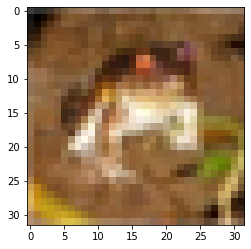

In [5]:
import matplotlib.pyplot as plt
digit = X_train[0]  # 9인지 확인
plt.imshow(digit)
plt.show()

In [6]:
import numpy as np
np.set_printoptions(linewidth = 150) 

print(X_train[0][0]) # array로 확인

[[ 59  62  63]
 [ 43  46  45]
 [ 50  48  43]
 [ 68  54  42]
 [ 98  73  52]
 [119  91  63]
 [139 107  75]
 [145 110  80]
 [149 117  89]
 [149 120  93]
 [131 103  77]
 [125  99  76]
 [142 115  91]
 [144 112  86]
 [137 105  79]
 [129  97  71]
 [137 106  79]
 [134 106  76]
 [124  97  64]
 [139 113  78]
 [139 112  75]
 [133 105  69]
 [136 105  74]
 [139 108  77]
 [152 120  89]
 [163 131 100]
 [168 136 108]
 [159 129 102]
 [158 130 104]
 [158 132 108]
 [152 125 102]
 [148 124 103]]


# 2. Data Preprocessing

- reshape
   - (50000, 32, 32, 3) to (50000, 3072)
   - 1차원으로 내린다

In [7]:
X_train = X_train.reshape((50000, 32 * 32 * 3)) # 50000만장의 이미지가 일정한 크기(32x32)로 3차원씩 있다.
X_test = X_test.reshape((10000, 32 * 32 * 3))

X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

- Normalization

In [8]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [9]:
print(X_train[0])

[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]


> ## 2) One Hot Encoding

In [10]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
print(y_train[:5])
# 6, 9, 9, 4, 1 표현

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# 3. Keras Modeling

> ## 1) Model Define

- 모델 신경망 구조 정의
   - 2개의 Hidden Layers & 3968개의 nodes

In [12]:
from keras import models
from keras import layers

cifar = models.Sequential()
cifar.add(layers.Dense(2048, activation = 'relu', input_shape = (32 * 32 * 3,))) # 3072 * 2048 + 2048
cifar.add(layers.Dense(1024, activation = 'relu'))
cifar.add(layers.Dense(512, activation = 'relu'))
cifar.add(layers.Dense(256, activation = 'relu')) 
cifar.add(layers.Dense(128, activation = 'relu'))
cifar.add(layers.Dense(10, activation = 'softmax')) 

- 모델 구조 확인

In [13]:
cifar.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              6293504   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 9,081,994
Trainable params: 9,081,994
Non-trainable params: 0
______________________________________________

> ## 2) Model Compile

- 모델 학습방법 설정

In [14]:
cifar.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])
# 0 ~ 9를 분류해야 하니까 다중분류_CEE

> ## 3) Model Fit

- 약 4분

In [15]:
%%time
hist_cifar = cifar.fit(X_train, y_train,
                         epochs = 100,
                         batch_size = 128,
                         validation_split = 0.2)
# GPU 키고 진행해야 빠르다

Epoch 1/100
313/313 [==============================] - 6s 9ms/step - loss: 3.0227 - accuracy: 0.1527 - val_loss: 2.1755 - val_accuracy: 0.2421
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 1.9484 - accuracy: 0.2933 - val_loss: 1.8460 - val_accuracy: 0.3407
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 1.8269 - accuracy: 0.3399 - val_loss: 1.8028 - val_accuracy: 0.3341
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 1.7586 - accuracy: 0.3655 - val_loss: 1.8535 - val_accuracy: 0.3430
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 1.6994 - accuracy: 0.3899 - val_loss: 1.6460 - val_accuracy: 0.4109
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 1.6460 - accuracy: 0.4112 - val_loss: 1.7281 - val_accuracy: 0.3952
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 1.6073 - accuracy: 0.4250 - val_loss: 1.7434 - val_accuracy: 0.3748

> ## 4) 학습 결과 시각화 - Overfitting

- Loss Visualization

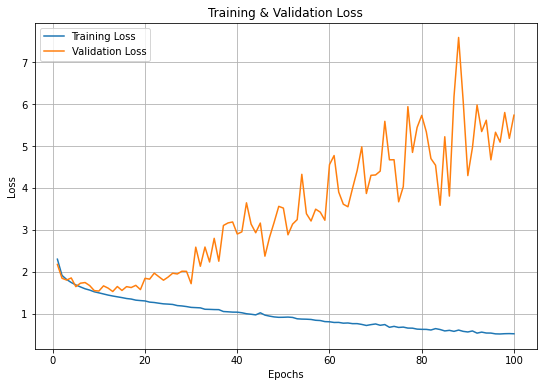

In [16]:
import matplotlib.pyplot as plt
epochs = range(1, len(hist_cifar.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_cifar.history['loss'])
plt.plot(epochs, hist_cifar.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

In [19]:
loss, accuracy = cifar.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
# loss = 5.09869 
# Accuracy = 0.50150
# 성능이 좋지 않다.

313/313 [==============================] - 1s 2ms/step - loss: 5.0987 - accuracy: 0.5015
Loss = 5.09869
Accuracy = 0.50150


> ## 6) Model Predict

- Probability

In [20]:
np.set_printoptions(suppress = True, precision = 9)
print(cifar.predict(X_test[:1,:]))

[[0.000000066 0.00000177  0.000042117 0.98483384  0.000730509 0.005787268 0.          0.000440848 0.008163476 0.000000015]]


- Class

In [21]:
print(cifar.predict_classes(X_test[:1,:]))

[3]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


###
#The End
###